In [4]:
#Importing Necessary Dependencies

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

# Checking Images in a folder

In [32]:
dirs = os.listdir('data/')
dirs
count = 0

for dir_ in dirs : 
    files = list(os.listdir('data/' + dir_))
    print(f"{dir_} folder has {len(files)} images")
    count = count + len(files)

print(f"Data folder has {count} images")

happy folder has 153 images
sad folder has 152 images
Data folder has 305 images


#  Distributing Data for training, testing and validation 

In [34]:
base_dir = 'data'
h, w = 180,180
batch = 32

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir, seed=123, validation_split=0.2, subset='training', batch_size=batch, image_size=(h,w))

Found 305 files belonging to 2 classes.
Using 244 files for training.


In [37]:
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir, seed=123, validation_split=0.2, subset='validation', batch_size=batch, image_size=(h,w))

Found 305 files belonging to 2 classes.
Using 61 files for validation.


In [39]:
dir_names = train_ds.class_names
print(dir_names)

['happy', 'sad']


# Visulizing Loaded Images

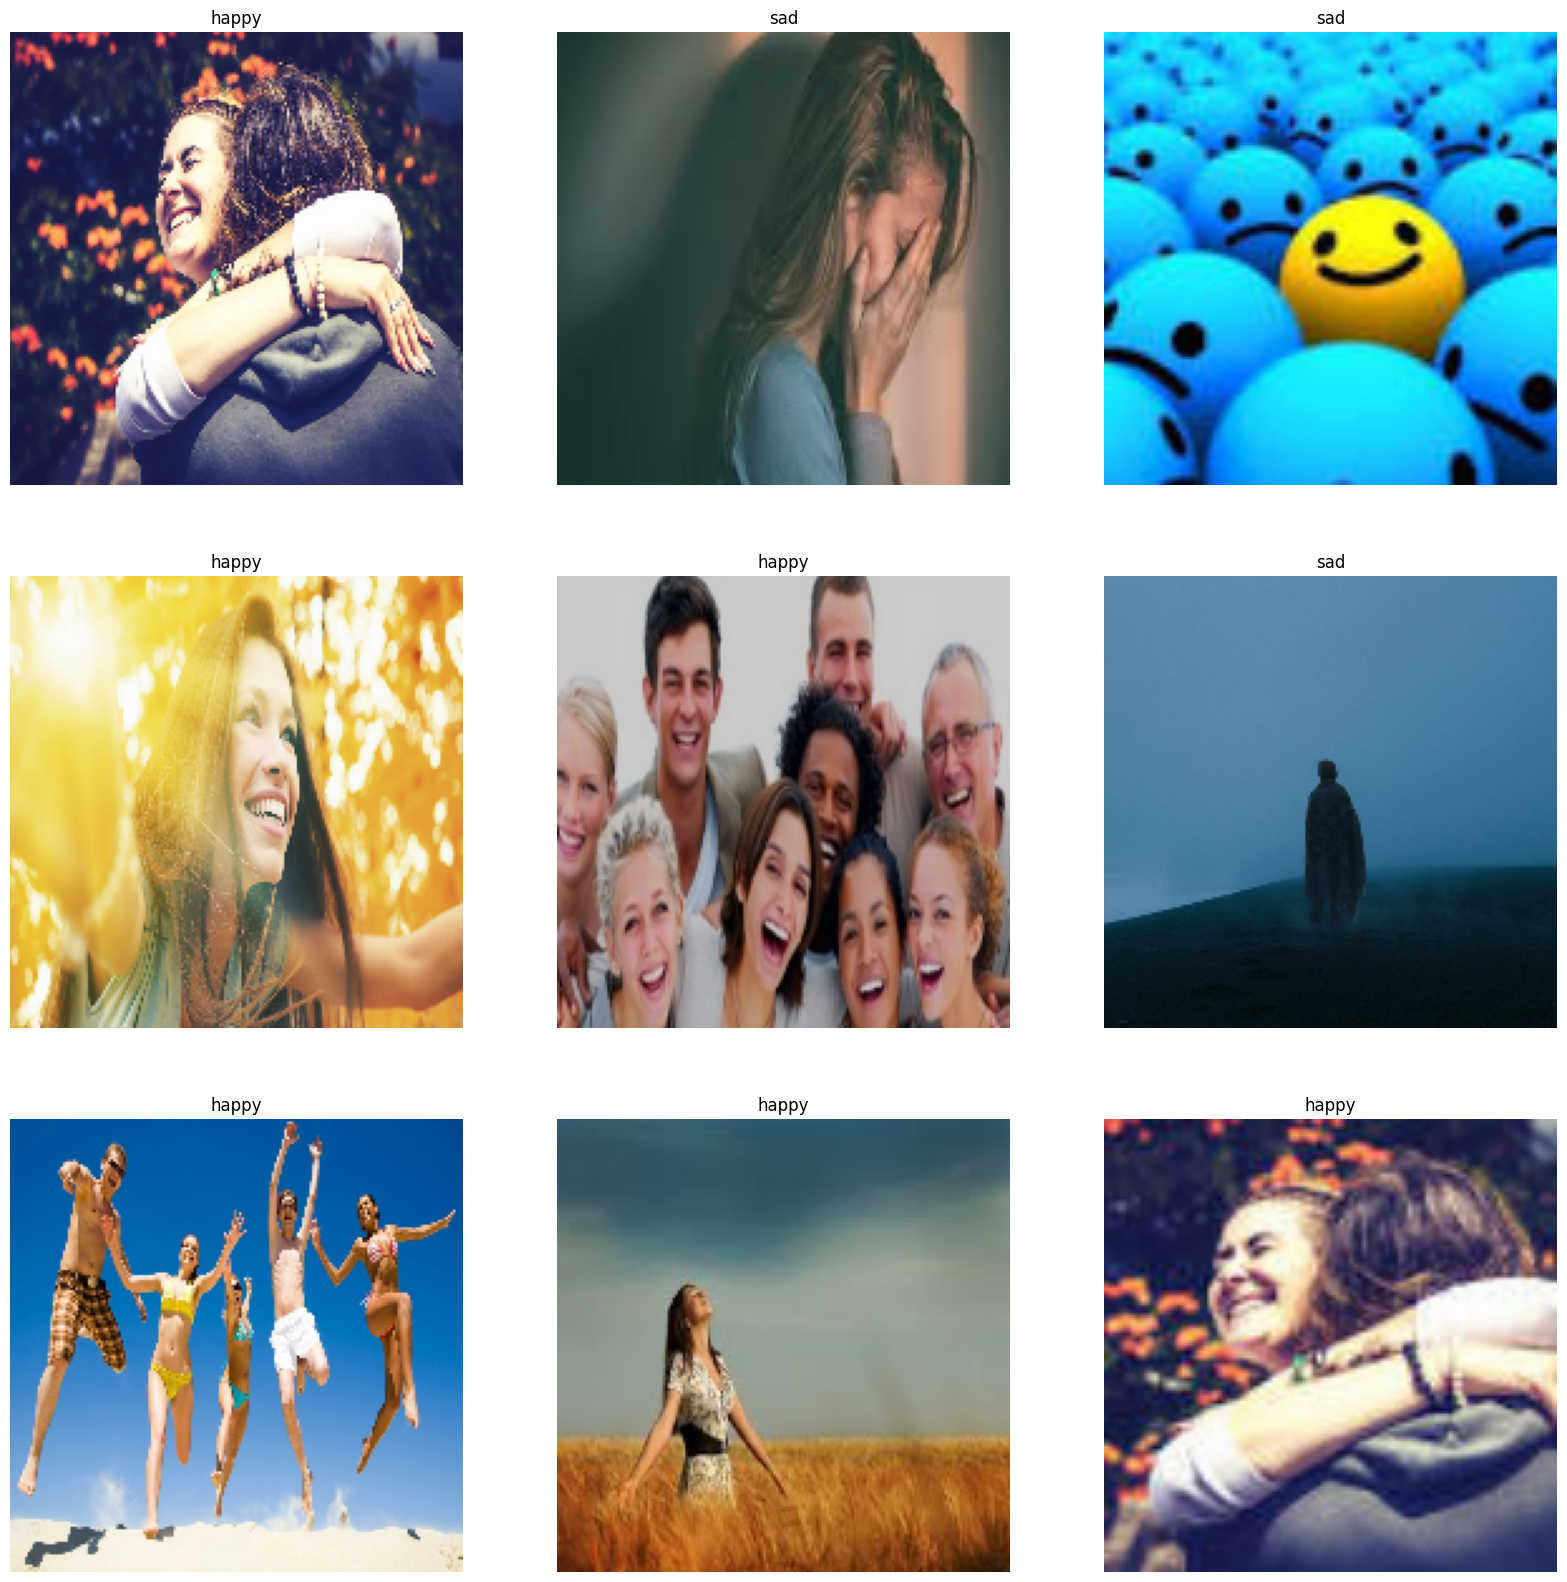

In [51]:
plt.figure(figsize=(20,20))

for images, labels in train_ds.take(1) :
    for i in range(9) : 
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype(int))
        plt.title(dir_names[labels[i]])
        plt.axis('off')

# Data Augmentation

In [57]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

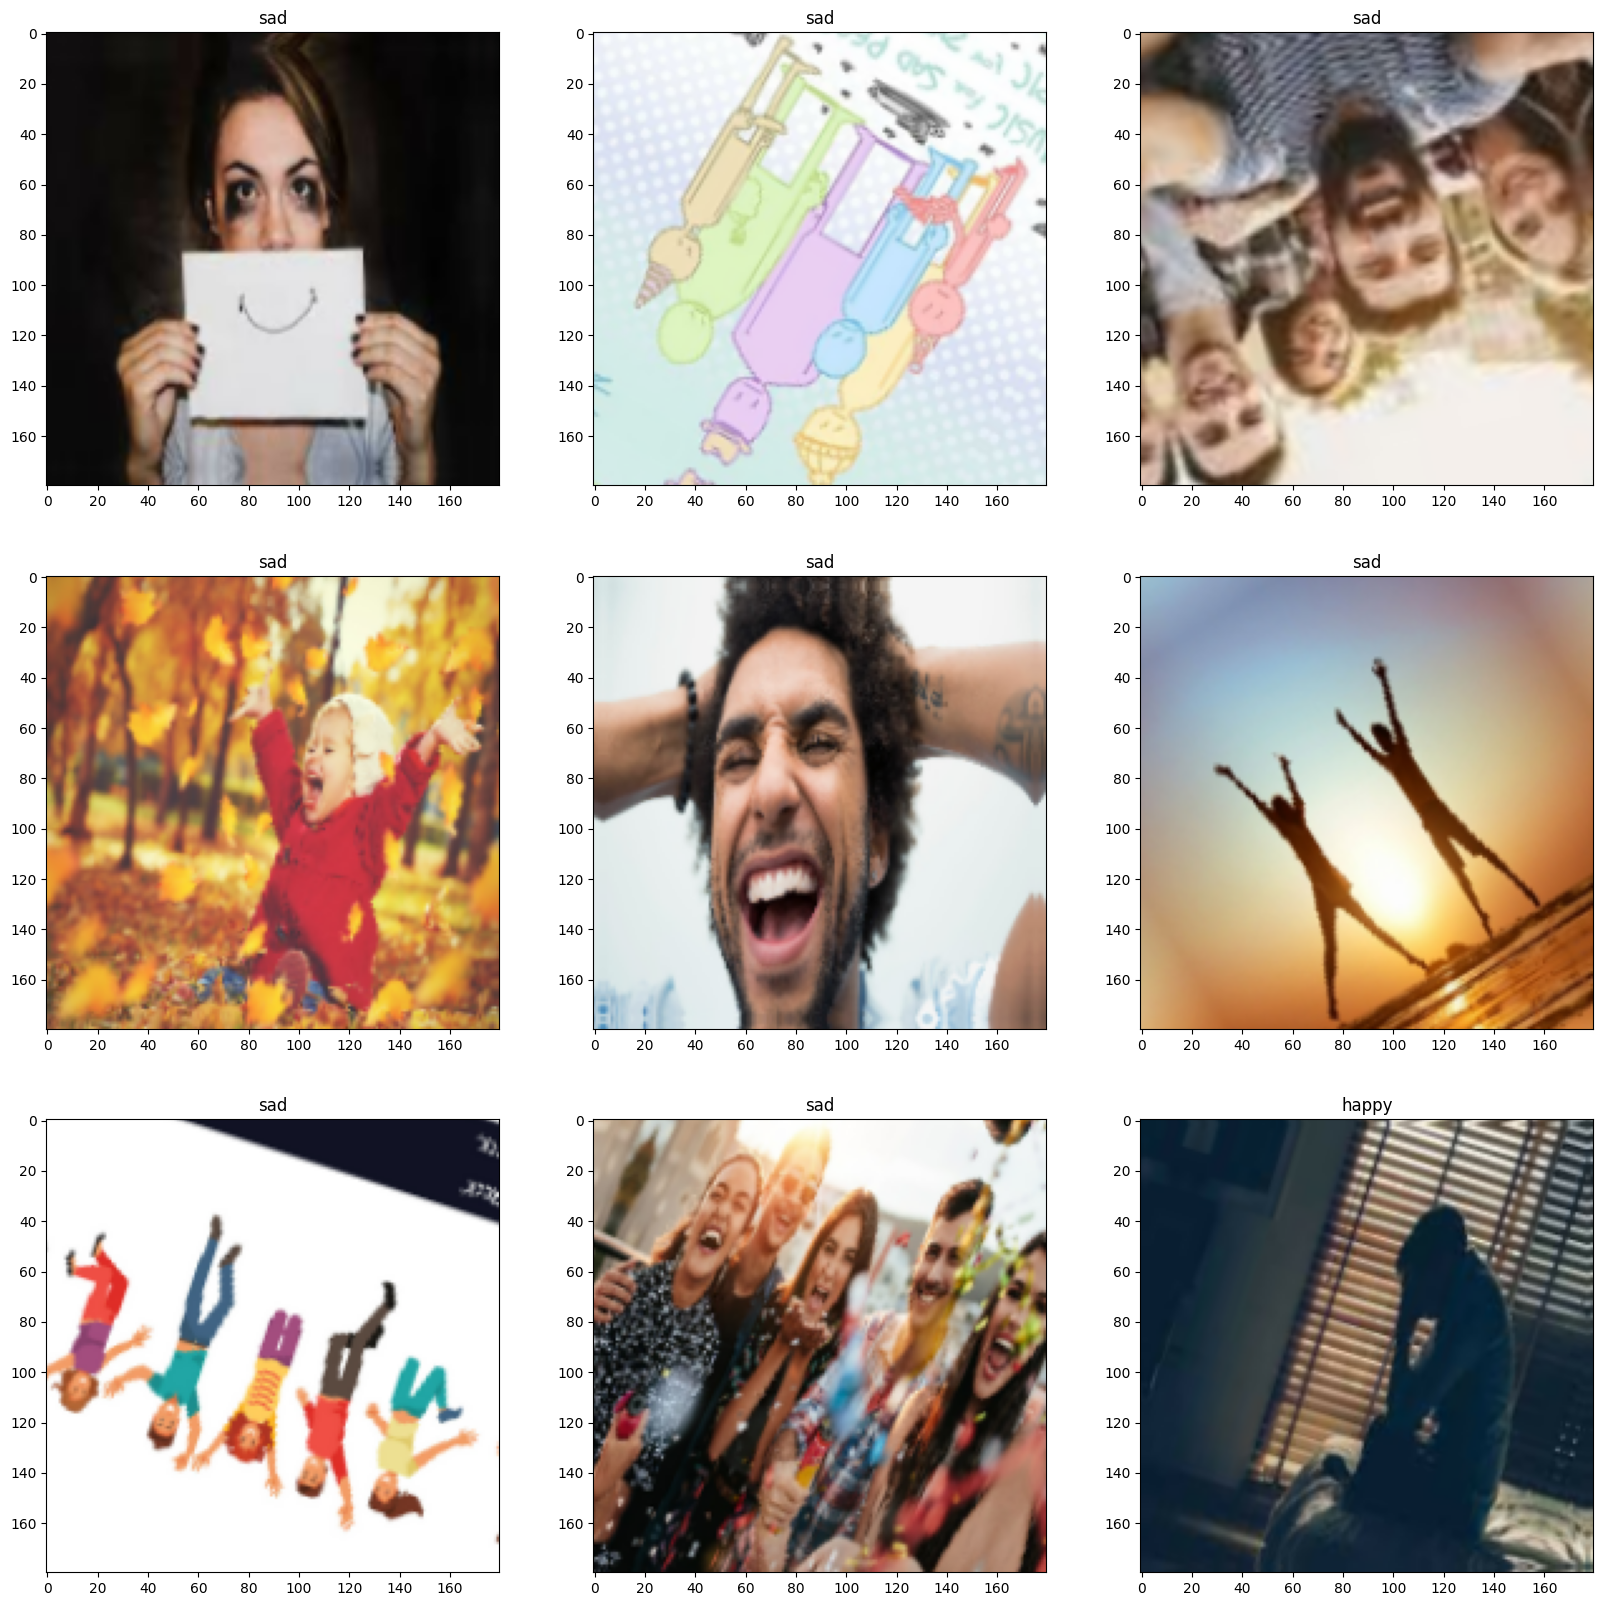

In [63]:
plt.figure(figsize=(20,20))

aug_images = data_augmentation(images)
for images, labels in train_ds.take(1) : 
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(aug_images[i].numpy().astype("uint8"))
        plt.title(dir_names[labels[i]])

# Model creation

In [69]:
model = Sequential([
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same' ,activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32, 3, padding='same' ,activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, padding='same' ,activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dense(5)
])

In [70]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [71]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=25)  

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.5904 - loss: 0.7011 - val_accuracy: 0.5738 - val_loss: 0.7343
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.6605 - loss: 0.5966 - val_accuracy: 0.6066 - val_loss: 0.6230
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.7413 - loss: 0.5431 - val_accuracy: 0.5082 - val_loss: 0.7240
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.6868 - loss: 0.5536 - val_accuracy: 0.6557 - val_loss: 0.6316
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7701 - loss: 0.4559 - val_accuracy: 0.7377 - val_loss: 0.6168
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7950 - loss: 0.4410 - val_accuracy: 0.7377 - val_loss: 0.5925
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.8303 - loss: 0.4061 - val_accuracy: 0.7049 - val_loss: 0.5889
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.8997 - loss: 0.3362 - val_accuracy: 0.7377 - val_loss: 0.5597
Epoch 9/

# Model Evaluation

In [82]:
def classify_image(input_path) : 
    input_img = tf.keras.preprocessing.image.load_img(input_path, target_size=(180,180))
    input_img_arr = tf.keras.utils.img_to_array(input_img)
    input_img_dims = tf.expand_dims(input_img_arr, 0)
    predictions = model.predict(input_img_dims)
    result = tf.nn.softmax(predictions[0])
    print(dir_names[np.argmax(result)])

In [86]:
classify_image('154006829.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
happy


In [85]:
model.save(os.path.join('models','2_image_classifier.h5'))